Programmer: Ryan Stampfli

EYBL Shots Project

7/7/2023

In [1]:
import utils
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import warnings

# Ignore the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

c:\Users\Centr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Shots Dataframe

In [2]:
rotary_shots_df = utils.load_data("EYBL NW Rotary Shot Data.csv")
print(len(rotary_shots_df))
#print(rotary_shots_df.head())

249


In [3]:
rotary_shots_df.drop(labels=["Unnamed: 21"], axis=1, inplace=True)

In [4]:
#print(rotary_shots_df.isnull().sum())
rotary_shots_df.dropna(inplace=True)
print(rotary_shots_df.isnull().sum())

yearSeason         0
idPlayer           0
namePlayer         0
nameTeam           0
typeEvent          0
typeAction         0
typeShot           0
dateGame           0
slugTeamHome       0
slugTeamAway       0
idGame             0
NumberHalf         0
zoneBasic          0
locationX          0
locationY          0
distanceShot       0
isShotAttempted    0
isShotMade         0
eventAction        0
catchLocation      0
finishingHand      0
dtype: int64


Separating Player Dataframes

In [5]:
winters_df = rotary_shots_df[rotary_shots_df["namePlayer"] == 'Winters Grady']
#print(winters_df.head())

isaac_df = rotary_shots_df[rotary_shots_df["namePlayer"] == 'Isaac Carr']
print(len(isaac_df))

110


Creating Location Dataframes

In [6]:
winters_left_corner_df = utils.filter_location_df(winters_df, 'Left CN')
winters_left_wing_df = utils.filter_location_df(winters_df, 'Left Wing')
winters_left_MR_df = utils.filter_location_df(winters_df, 'Left MR')
winters_TOK_df = utils.filter_location_df(winters_df, 'Top of Key')
winters_right_MR_df = utils.filter_location_df(winters_df, 'Right MR')
winters_right_wing_df = utils.filter_location_df(winters_df, 'Right Wing')
winters_right_corner_df = utils.filter_location_df(winters_df, 'Right CN')
winters_left_SC_df = utils.filter_location_df(winters_df, 'Left SC')
winters_right_SC_df = utils.filter_location_df(winters_df, 'Right SC')
winters_paint_df = utils.filter_location_df(winters_df, 'Paint')
winters_transition_df = utils.filter_location_df(winters_df, 'Transition')
winters_left_block_df = utils.filter_location_df(winters_df, 'Left Block')
winters_right_block_df = utils.filter_location_df(winters_df, 'Right Block')

isaac_left_corner_df = utils.filter_location_df(isaac_df, 'Left CN')
isaac_left_wing_df = utils.filter_location_df(isaac_df, 'Left Wing')
isaac_left_MR_df = utils.filter_location_df(isaac_df, 'Left MR')
isaac_TOK_df = utils.filter_location_df(isaac_df, 'Top of Key')
isaac_right_MR_df = utils.filter_location_df(isaac_df, 'Right MR')
isaac_right_wing_df = utils.filter_location_df(isaac_df, 'Right Wing')
isaac_right_corner_df = utils.filter_location_df(isaac_df, 'Right CN')
isaac_left_SC_df = utils.filter_location_df(isaac_df, 'Left SC')
isaac_right_SC_df = utils.filter_location_df(isaac_df, 'Right SC')
isaac_paint_df = utils.filter_location_df(isaac_df, 'Paint')
isaac_transition_df = utils.filter_location_df(isaac_df, 'Transition')
isaac_left_block_df = utils.filter_location_df(isaac_df, 'Left Block')
isaac_right_block_df = utils.filter_location_df(isaac_df, 'Right Block')


Calculating Location Shooting Percentage

In [7]:
print(winters_left_corner_df.columns)

Index(['yearSeason', 'idPlayer', 'namePlayer', 'nameTeam', 'typeEvent',
       'typeAction', 'typeShot', 'dateGame', 'slugTeamHome', 'slugTeamAway',
       'idGame', 'NumberHalf', 'zoneBasic', 'locationX', 'locationY',
       'distanceShot', 'isShotAttempted', 'isShotMade', 'eventAction',
       'catchLocation', 'finishingHand'],
      dtype='object')


In [8]:
winters_left_corner_percentage = utils.location_percentage(winters_left_corner_df)
winters_left_wing_percentage = utils.location_percentage(winters_left_wing_df)
winters_left_MR_percentage = utils.location_percentage(winters_left_MR_df)
winters_TOK_percentage = utils.location_percentage(winters_TOK_df)
winters_right_MR_percentage = utils.location_percentage(winters_right_MR_df)
winters_right_wing_percentage = utils.location_percentage(winters_right_wing_df)
winters_right_corner_percentage = utils.location_percentage(winters_right_corner_df)
winters_left_SC_percentage = utils.location_percentage(winters_left_SC_df)
winters_right_SC_percentage = utils.location_percentage(winters_right_SC_df)
winters_paint_percentage = utils.location_percentage(winters_paint_df)
winters_transition_percentage = utils.location_percentage(winters_transition_df)
winters_left_block_percentage = utils.location_percentage(winters_left_block_df)
winters_right_block_percentage = utils.location_percentage(winters_right_block_df)

print("")

isaac_TOK_percentage = utils.location_percentage(isaac_TOK_df)
isaac_left_corner_percentage = utils.location_percentage(isaac_left_corner_df)
isaac_left_wing_percentage = utils.location_percentage(isaac_left_wing_df)
#isaac_left_MR_percentage = utils.location_percentage(isaac_left_MR_df)
isaac_right_MR_percentage = utils.location_percentage(isaac_right_MR_df)
isaac_right_wing_percentage = utils.location_percentage(isaac_right_wing_df)
isaac_right_corner_percentage = utils.location_percentage(isaac_right_corner_df)
isaac_left_SC_percentage = utils.location_percentage(isaac_left_SC_df)
#isaac_right_SC_percentage = utils.location_percentage(isaac_right_SC_df)
isaac_paint_percentage = utils.location_percentage(isaac_paint_df)
isaac_transition_percentage = utils.location_percentage(isaac_transition_df)
#isaac_left_block_percentage = utils.location_percentage(isaac_left_block_df)
isaac_right_block_percentage = utils.location_percentage(isaac_right_block_df)

0.455
0.4
0.0
0.346
0.0
0.391
0.462
0.0
0.333
0.625
0.286
0.0
0.667

0.421
0.538
0.522
0.0
0.364
0.556
0.5
0.667
0.5
0.5


Exporting Data

In [9]:
column_names = ['namePlayer', 'Top Of Key Percentage', 'Left Wing Percentage', 'Left Corner Percentage',
                'Left Mid Range Percentage', 'Left Short Corner Percentage', 'Left Block Percentage', 'Paint Percentage',
                'Right Block Percentage', 'Right Short Corner Percentage', 'Right Mid Range Percentage',
                'Right Corner Percentage', 'Right Wing Percentage', 'Transition Percentage']
data = [['Winters Grady', winters_TOK_percentage, winters_left_wing_percentage, winters_left_corner_percentage,
         winters_left_MR_percentage, winters_left_SC_percentage, winters_left_block_percentage, winters_paint_percentage,
         winters_right_block_percentage, winters_right_SC_percentage, winters_right_MR_percentage,
         winters_right_corner_percentage, winters_right_wing_percentage, winters_transition_percentage],

        ['Isaac Carr', isaac_TOK_percentage, isaac_left_wing_percentage, isaac_left_corner_percentage, 'isaac_left_MR_percentage', 
        isaac_left_SC_percentage, 'isaac_left_block_percentage', 
        isaac_paint_percentage, isaac_right_block_percentage, 'isaac_right_SC_percentage', 
        isaac_right_MR_percentage, isaac_right_corner_percentage, isaac_right_wing_percentage, isaac_transition_percentage]]

location_percentages_df = pd.DataFrame(data, columns=column_names)
location_percentages_df = location_percentages_df.set_index("namePlayer")

In [10]:
location_percentages_df.to_csv("EYBL_events_percentages.csv", index=True)

Creating Action Dataframes

In [11]:
winters_CandS_df = utils.filter_action_df(winters_df, 'C&S')
winters_left_drive_layup_df = utils.filter_action_df(winters_df, 'LD LU')
winters_right_drive_layup_df = utils.filter_action_df(winters_df, 'RD LU')
winters_putback_df = utils.filter_action_df(winters_df, 'PB')
winters_left_drive_pullup_df = utils.filter_action_df(winters_df, 'LD PU')
winters_right_drive_pullup_df = utils.filter_action_df(winters_df, 'RD PU')
winters_left_spin_post_fade_df = utils.filter_action_df(winters_df, 'SL PF')
winters_right_spin_post_fade_df = utils.filter_action_df(winters_df, 'SR PF')
winters_left_drive_floater_df = utils.filter_action_df(winters_df, 'LD FL')
winters_right_drive_floater_df = utils.filter_action_df(winters_df, 'RD FL')
winters_left_spin_layup_df = utils.filter_action_df(winters_df, 'SL LU')
winters_right_spin_layup_df = utils.filter_action_df(winters_df, 'SR LU')
winters_size_up_df = utils.filter_action_df(winters_df, 'SU')

isaac_CandS_df = utils.filter_action_df(isaac_df, 'C&S')
isaac_left_drive_layup_df = utils.filter_action_df(isaac_df, 'LD LU')
isaac_right_drive_layup_df = utils.filter_action_df(isaac_df, 'RD LU')
isaac_putback_df = utils.filter_action_df(isaac_df, 'PB')
isaac_left_drive_pullup_df = utils.filter_action_df(isaac_df, 'LD PU')
isaac_right_drive_pullup_df = utils.filter_action_df(isaac_df, 'RD PU')
isaac_left_spin_post_fade_df = utils.filter_action_df(isaac_df, 'SL PF')
isaac_right_spin_post_fade_df = utils.filter_action_df(isaac_df, 'SR PF')
isaac_left_drive_floater_df = utils.filter_action_df(isaac_df, 'LD FL')
isaac_right_drive_floater_df = utils.filter_action_df(isaac_df, 'RD FL')
isaac_left_spin_layup_df = utils.filter_action_df(isaac_df, 'SL LU')
isaac_right_spin_layup_df = utils.filter_action_df(isaac_df, 'SR LU')
isaac_size_up_df = utils.filter_action_df(isaac_df, 'SU')

Calculating Action Shooting Percentages

In [12]:
winters_CandS_percentage = utils.action_percentage(winters_CandS_df)
winters_putback_percentage = utils.action_percentage(winters_putback_df)
winters_size_up_percentage = utils.action_percentage(winters_size_up_df)
winters_left_drive_layup_percentage = utils.action_percentage(winters_left_drive_layup_df)
winters_left_drive_pullup_percentage = utils.action_percentage(winters_left_drive_pullup_df)
winters_left_spin_post_fade_percentage = utils.action_percentage(winters_left_spin_post_fade_df)
winters_left_drive_floater_percentage = utils.action_percentage(winters_left_drive_floater_df)
winters_left_spin_layup_percentage = utils.action_percentage(winters_left_spin_layup_df)
winters_right_drive_layup_percentage = utils.action_percentage(winters_right_drive_layup_df)
winters_right_drive_pullup_percentage = utils.action_percentage(winters_right_drive_pullup_df)
winters_right_spin_post_fade_percentage = utils.action_percentage(winters_right_spin_post_fade_df)
winters_right_drive_floater_percentage = utils.action_percentage(winters_right_drive_floater_df)
#winters_right_spin_layup_percentage = utils.action_percentage(winters_right_spin_layup_df)


print("")

isaac_CandS_percentage = utils.action_percentage(isaac_CandS_df)
isaac_putback_percentage = utils.action_percentage(isaac_putback_df)
isaac_size_up_percentage = utils.action_percentage(isaac_size_up_df)
isaac_left_drive_layup_percentage = utils.action_percentage(isaac_left_drive_layup_df)
isaac_left_drive_pullup_percentage = utils.action_percentage(isaac_left_drive_pullup_df)
#isaac_left_spin_post_fade_percentage = utils.action_percentage(isaac_left_spin_post_fade_df)
#isaac_left_drive_floater_percentage = utils.action_percentage(isaac_left_drive_floater_df)
#isaac_left_spin_layup_percentage = utils.action_percentage(isaac_left_spin_layup_df)
isaac_right_drive_layup_percentage = utils.action_percentage(isaac_right_drive_layup_df)
isaac_right_drive_pullup_percentage = utils.action_percentage(isaac_right_drive_pullup_df)
isaac_right_spin_post_fade_percentage = utils.action_percentage(isaac_right_spin_post_fade_df)
#isaac_right_drive_floater_percentage = utils.action_percentage(isaac_right_drive_floater_df)
#isaac_right_spin_layup_percentage = utils.action_percentage(isaac_right_spin_layup_df)

Shots: 52
0.308
Shots: 6
0.5
Shots: 4
0.75
Shots: 2
0.5
Shots: 6
0.333
Shots: 8
0.25
Shots: 2
0.5
Shots: 1
0.0
Shots: 25
0.44
Shots: 12
0.333
Shots: 5
0.6
Shots: 9
0.333

Shots: 39
0.385
Shots: 4
0.25
Shots: 2
1.0
Shots: 23
0.609
Shots: 17
0.353
Shots: 14
0.643
Shots: 6
0.333
Shots: 1
0.0


In [13]:
column_names = ['namePlayer', 'Catch and Shoot Percentage', 'Left Drive Layup Percentage', 'Right Drive Layup Percentage', 
'Putback Percentage', 'Left Drive Pullup Percentage', 'Right Drive Pullup Pecentage',
'Left Spin Post Fade Percentage', 'Right Spin Post Fade Percentage', 'Left Drive Floater Percentage', 
'Right Drive Floater Percentage', 'Left Spin Layup Percentage', 'Right Spin Layup Percentage', 'Size Up Percentage']
data = [['Winters Grady', winters_CandS_percentage, winters_left_drive_layup_percentage, 
winters_right_drive_layup_percentage, winters_putback_percentage, winters_left_drive_pullup_percentage, winters_right_drive_pullup_percentage, 
winters_left_spin_post_fade_percentage, winters_right_spin_post_fade_percentage, winters_left_drive_floater_percentage, 
winters_right_drive_floater_percentage, winters_left_spin_layup_percentage, 
'winters_right_spin_layup_percentage', winters_size_up_percentage],
['Isaac Carr', isaac_CandS_percentage, isaac_left_drive_layup_percentage, isaac_right_drive_layup_percentage,
isaac_putback_percentage, isaac_left_drive_pullup_percentage, isaac_right_drive_pullup_percentage, 
'isaac_left_spin_post_fade_percentage', isaac_right_spin_post_fade_percentage, 'isaac_left_drive_floater_percentage', 
'isaac_right_drive_floater_percentage', 'isaac_left_spin_layup_percentage', 'isaac_right_spin_layup_percentage', 
isaac_size_up_percentage]]
action_percentages_df = pd.DataFrame(data, columns=column_names)
action_percentages_df = action_percentages_df.set_index("namePlayer")

In [14]:
percentages_combined_df = location_percentages_df.merge(action_percentages_df, on="namePlayer")
percentages_combined_df.to_csv("EYBL_events_percentages.csv", index=True)

Creating Dataframe with only finishes 

In [15]:
winters_finishes_df = utils.delete_none_finishes(winters_df, 'finishingHand', 'none')
isaac_finishes_df = utils.delete_none_finishes(isaac_df, 'finishingHand', 'none')
print(len(winters_finishes_df))
print(len(isaac_finishes_df))

51
42


In [16]:
winters_right_finishes_count = utils.finishingHand_count(winters_finishes_df, 'finishingHand', 'right')
winters_left_finishes_count = utils.finishingHand_count(winters_finishes_df, 'finishingHand', 'left')
print(winters_right_finishes_count)
print(winters_left_finishes_count)

print("")

isaac_right_finishes_count = utils.finishingHand_count(isaac_finishes_df, 'finishingHand', 'right')
isaac_left_finishes_count = utils.finishingHand_count(isaac_finishes_df, 'finishingHand', 'left')
print(isaac_right_finishes_count)
print(isaac_left_finishes_count)

50
0

25
17


In [17]:
winters_leftHand_df = utils.filter_hand_df(winters_df, 'left')
winters_rightHand_df = utils.filter_hand_df(winters_df, 'right')

isaac_leftHand_df = utils.filter_hand_df(isaac_df, 'left')
isaac_rightHand_df = utils.filter_hand_df(isaac_df, 'right')

In [18]:
#winters_left_finishes_percentage = utils.finishingHand_percentage(winters_leftHand_df)
winters_right_finishes_percentage = utils.finishingHand_percentage(winters_rightHand_df)

print("")

isaac_left_finishes_percentage = utils.finishingHand_percentage(isaac_leftHand_df)
isaac_right_finishes_percentage = utils.finishingHand_percentage(isaac_rightHand_df)

0.46

0.529
0.6


In [19]:
column_names = ['namePlayer', 'Left Hand Finish Percentage', 'Right Hand Finish Percentage']
data = [['Winters Grady', 'winters_left_finishes_percentage', winters_right_finishes_percentage],
['Isaac Carr', isaac_left_finishes_percentage, isaac_right_finishes_percentage]]
finishingHand_percentages_df = pd.DataFrame(data, columns=column_names)
finishingHand_percentages_df = finishingHand_percentages_df.set_index("namePlayer")

In [20]:
percentages_combined_df = percentages_combined_df.merge(finishingHand_percentages_df, on="namePlayer")
percentages_combined_df.to_csv("EYBL_events_percentages.csv", index=True)

Creating Drive Finishes Data

In [21]:
winters_right_drive_df = winters_df[(winters_df['eventAction'] == 'RD LU') | (winters_df['eventAction'] == 'RD FL')]

winters_right_drive_makes_df = winters_right_drive_df[(winters_right_drive_df['typeEvent'] == 'Made Shot')]
hand_makes = winters_right_drive_makes_df['isShotMade'].count()


winters_drive_right_finish_right_df = utils.creating_driving_finishing_df(winters_right_drive_df, 'right')
winters_drive_right_finish_right_percentage = utils.finishingHand_percentage(winters_drive_right_finish_right_df)

# winters_drive_right_finish_left_df = utils.creating_driving_finishing_df(winters_right_drive_df, 'left')
# #winters_drive_right_finish_left_percentage = utils.finishingHand_percentage(winters_drive_right_finish_left_df)

0.394


In [22]:
winters_left_drive_df = winters_df[(winters_df['eventAction'] == 'LD LU') | (winters_df['eventAction'] == 'LD FL')]
#print(len(winters_left_drive_df))

winters_drive_left_finish_right_df = utils.creating_driving_finishing_df(winters_left_drive_df, 'right')
winters_drive_left_finish_right_percentage = utils.finishingHand_percentage(winters_drive_left_finish_right_df)

winters_drive_left_finish_left_df = utils.creating_driving_finishing_df(winters_left_drive_df, 'left')
#winters_drive_left_finish_left_percentage = utils.finishingHand_percentage(winters_drive_left_finish_left_df)

0.5


In [23]:
isaac_right_drive_df = isaac_df[(isaac_df['eventAction'] == 'RD LU') | (isaac_df['eventAction'] == 'RD FL')]
#print(len(isaac_right_drive_df))

isaac_drive_right_finish_right_df = utils.creating_driving_finishing_df(isaac_right_drive_df, 'right')
isaac_drive_right_finish_right_percentage = utils.finishingHand_percentage(isaac_drive_right_finish_right_df)

isaac_drive_right_finish_left_df = utils.creating_driving_finishing_df(isaac_right_drive_df, 'left')
isaac_drive_right_finish_left_percentage = utils.finishingHand_percentage(isaac_drive_right_finish_left_df)

0.571
0.6


In [24]:
isaac_left_drive_df = isaac_df[(isaac_df['eventAction'] == 'LD LU') | (isaac_df['eventAction'] == 'LD FL')]
print(len(isaac_left_drive_df))

isaac_drive_left_finish_right_df = utils.creating_driving_finishing_df(isaac_left_drive_df, 'right')
isaac_drive_left_finish_right_percentage = utils.finishingHand_percentage(isaac_drive_left_finish_right_df)

isaac_drive_left_finish_left_df = utils.creating_driving_finishing_df(isaac_left_drive_df, 'left')
isaac_drive_left_finish_left_percentage = utils.finishingHand_percentage(isaac_drive_left_finish_left_df)

23
0.727
0.5


In [25]:
column_names = ['namePlayer', 'Left Drive Left Hand Finish Percentage', 'Left Drive Right Hand Finish Percentage', 
                'Right Drive Left Hand Finish Percentage', 'Right Drive Right Hand Finish Percentage']
data = [['Winters Grady', 'winters_drive_left_finish_left_percentage', winters_drive_left_finish_right_percentage, 
         'winters_drive_right_finish_left_percentage', winters_drive_right_finish_right_percentage],
['Isaac Carr', isaac_drive_left_finish_left_percentage, isaac_drive_left_finish_right_percentage, 
         isaac_drive_right_finish_left_percentage, isaac_drive_right_finish_right_percentage]]
drivingDirection_finishingHand_percentages_df = pd.DataFrame(data, columns=column_names)
drivingDirection_finishingHand_percentages_df = drivingDirection_finishingHand_percentages_df.set_index("namePlayer")

In [26]:
percentages_combined_df = percentages_combined_df.merge(drivingDirection_finishingHand_percentages_df, on="namePlayer")
percentages_combined_df.to_csv("EYBL_events_percentages.csv", index=True)

Creating Catch Location Percentages

In [27]:
winters_left_catch_df = winters_df[(winters_df['catchLocation'] == 'Left CN') | (winters_df['catchLocation'] == 'Left MR') | 
(winters_df['catchLocation'] == 'Left SC') | (winters_df['catchLocation'] == 'Left Wing')]

winters_left_catch_left_action_df = winters_left_catch_df[(winters_left_catch_df['eventAction'] == 'LD FL') | (winters_left_catch_df['eventAction'] == 'LD LU') | 
(winters_left_catch_df['eventAction'] == 'LD PU') | (winters_left_catch_df['eventAction'] == 'SL PF')]
winters_left_catch_left_action_percentage = utils.action_percentage(winters_left_catch_left_action_df)

winters_left_catch_right_action_df = winters_left_catch_df[(winters_left_catch_df['eventAction'] == 'RD FL') | (winters_left_catch_df['eventAction'] == 'RD LU') | 
(winters_left_catch_df['eventAction'] == 'RD PU') | (winters_left_catch_df['eventAction'] == 'SR PF')]
winters_left_catch_right_action_percentage = utils.action_percentage(winters_left_catch_right_action_df)

Shots: 6
0.333
Shots: 12
0.5


In [28]:
winters_center_catch_df = winters_df[(winters_df['catchLocation'] == 'Top of Key') | (winters_df['catchLocation'] == 'MD MR')]

winters_center_catch_left_action_df = winters_center_catch_df[(winters_center_catch_df['eventAction'] == 'LD FL') | (winters_center_catch_df['eventAction'] == 'LD LU') | 
(winters_center_catch_df['eventAction'] == 'LD PU') | (winters_center_catch_df['eventAction'] == 'SL PF')]
winters_center_catch_left_action_percentage = utils.action_percentage(winters_center_catch_left_action_df)

winters_center_catch_right_action_df = winters_center_catch_df[(winters_center_catch_df['eventAction'] == 'RD FL') | (winters_center_catch_df['eventAction'] == 'RD LU') | 
(winters_center_catch_df['eventAction'] == 'RD PU') | (winters_center_catch_df['eventAction'] == 'SR PF')]
winters_center_catch_right_action_percentage = utils.action_percentage(winters_center_catch_right_action_df)

Shots: 5
0.2
Shots: 15
0.4


In [29]:
winters_right_catch_df = winters_df[(winters_df['catchLocation'] == 'Right CN') | (winters_df['catchLocation'] == 'Right MR') | 
(winters_df['catchLocation'] == 'Right SC') | (winters_df['catchLocation'] == 'Right Wing')]

winters_right_catch_left_action_df = winters_right_catch_df[(winters_right_catch_df['eventAction'] == 'LD FL') | (winters_right_catch_df['eventAction'] == 'LD LU') | 
(winters_right_catch_df['eventAction'] == 'LD PU') | (winters_right_catch_df['eventAction'] == 'SL PF')]
winters_right_catch_left_action_percentage = utils.action_percentage(winters_right_catch_left_action_df)

winters_right_catch_right_action_df = winters_right_catch_df[(winters_right_catch_df['eventAction'] == 'RD FL') | (winters_right_catch_df['eventAction'] == 'RD LU') | 
(winters_right_catch_df['eventAction'] == 'RD PU') | (winters_right_catch_df['eventAction'] == 'SR PF')]
winters_right_catch_right_action_percentage = utils.action_percentage(winters_right_catch_right_action_df)

Shots: 5
0.4
Shots: 19
0.421


In [30]:
isaac_left_catch_df = isaac_df[(isaac_df['catchLocation'] == 'Left CN') | (isaac_df['catchLocation'] == 'Left MR') | 
(isaac_df['catchLocation'] == 'Left SC') | (isaac_df['catchLocation'] == 'Left Wing')]

isaac_left_catch_left_action_df = isaac_left_catch_df[(isaac_left_catch_df['eventAction'] == 'LD FL') | (isaac_left_catch_df['eventAction'] == 'LD LU') | 
(isaac_left_catch_df['eventAction'] == 'LD PU') | (isaac_left_catch_df['eventAction'] == 'SL PF')]
isaac_left_catch_left_action_percentage = utils.action_percentage(isaac_left_catch_left_action_df)

isaac_left_catch_right_action_df = isaac_left_catch_df[(isaac_left_catch_df['eventAction'] == 'RD FL') | (isaac_left_catch_df['eventAction'] == 'RD LU') | 
(isaac_left_catch_df['eventAction'] == 'RD PU') | (isaac_left_catch_df['eventAction'] == 'SR PF')]
isaac_left_catch_right_action_percentage = utils.action_percentage(isaac_left_catch_right_action_df)

Shots: 11
0.455
Shots: 4
0.75


In [31]:
isaac_center_catch_df = isaac_df[(isaac_df['catchLocation'] == 'Top of Key') | (isaac_df['catchLocation'] == 'MD MR')]

isaac_center_catch_left_action_df = isaac_center_catch_df[(isaac_center_catch_df['eventAction'] == 'LD FL') | (isaac_center_catch_df['eventAction'] == 'LD LU') | 
(isaac_center_catch_df['eventAction'] == 'LD PU') | (isaac_center_catch_df['eventAction'] == 'SL PF')]
isaac_center_catch_left_action_percentage = utils.action_percentage(isaac_center_catch_left_action_df)

isaac_center_catch_right_action_df = isaac_center_catch_df[(isaac_center_catch_df['eventAction'] == 'RD FL') | (isaac_center_catch_df['eventAction'] == 'RD LU') | 
(isaac_center_catch_df['eventAction'] == 'RD PU') | (isaac_center_catch_df['eventAction'] == 'SR PF')]
isaac_center_catch_right_action_percentage = utils.action_percentage(isaac_center_catch_right_action_df)

Shots: 11
0.636
Shots: 5
0.0


In [32]:
isaac_right_catch_df = isaac_df[(isaac_df['catchLocation'] == 'Right CN') | (isaac_df['catchLocation'] == 'Right MR') | 
(isaac_df['catchLocation'] == 'Right SC') | (isaac_df['catchLocation'] == 'Right Wing')]

isaac_right_catch_left_action_df = isaac_right_catch_df[(isaac_right_catch_df['eventAction'] == 'LD FL') | (isaac_right_catch_df['eventAction'] == 'LD LU') | 
(isaac_right_catch_df['eventAction'] == 'LD PU') | (isaac_right_catch_df['eventAction'] == 'SL PF')]
isaac_right_catch_left_action_percentage = utils.action_percentage(isaac_right_catch_left_action_df)

isaac_right_catch_right_action_df = isaac_right_catch_df[(isaac_right_catch_df['eventAction'] == 'RD FL') | (isaac_right_catch_df['eventAction'] == 'RD LU') | 
(isaac_right_catch_df['eventAction'] == 'RD PU') | (isaac_right_catch_df['eventAction'] == 'SR PF')]
isaac_right_catch_right_action_percentage = utils.action_percentage(isaac_right_catch_right_action_df)

Shots: 13
0.462
Shots: 5
0.6


In [33]:
column_names = ['namePlayer', 'Left Catch Left Action Percentage', 'Left Catch Right Action Percentage', 'Center Catch Left Action Percentage', 
                'Center Catch Right Action Percentage','Right Catch Left Action Percentage', 'Right Catch Right Action Percentage']
data = [['Winters Grady', winters_left_catch_left_action_percentage, winters_left_catch_right_action_percentage,
        winters_center_catch_left_action_percentage, winters_center_catch_right_action_percentage,
        winters_right_catch_left_action_percentage, winters_right_catch_right_action_percentage],
['Isaac Carr', isaac_left_catch_left_action_percentage, isaac_left_catch_right_action_percentage,
        isaac_center_catch_left_action_percentage,isaac_center_catch_right_action_percentage,
        isaac_right_catch_left_action_percentage, isaac_right_catch_right_action_percentage]]
catchLocation_action_percentages_df = pd.DataFrame(data, columns=column_names)
catchLocation_action_percentages_df = catchLocation_action_percentages_df.set_index("namePlayer")

In [34]:
percentages_combined_df = percentages_combined_df.merge(catchLocation_action_percentages_df, on="namePlayer")
percentages_combined_df.to_csv("EYBL_events_percentages.csv", index=True)

Pie Chart 

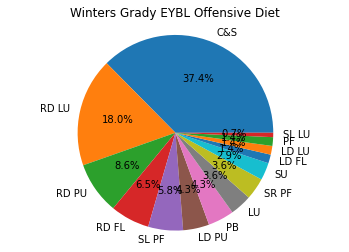

In [35]:
event_action_count_ser = winters_df["eventAction"].value_counts()
utils.pie_chart(event_action_count_ser.index, event_action_count_ser, 'Winters Grady EYBL Offensive Diet', 'winters_offensive_diet')


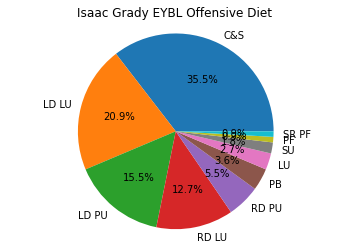

In [36]:
event_action_count_ser = isaac_df["eventAction"].value_counts()
utils.pie_chart(event_action_count_ser.index, event_action_count_ser, 'Isaac Grady EYBL Offensive Diet', 'Isaac_offensive_diet')